<a href="https://colab.research.google.com/github/Muhamadsulton/kaggle/blob/main/%D0%BA%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BA%D0%BE%D1%80%D0%B8%D0%BD%D0%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full (1).csv


In [ ]:
data = pd.read_csv('bank-full.csv', sep=';')

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.shape

(45211, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
data.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


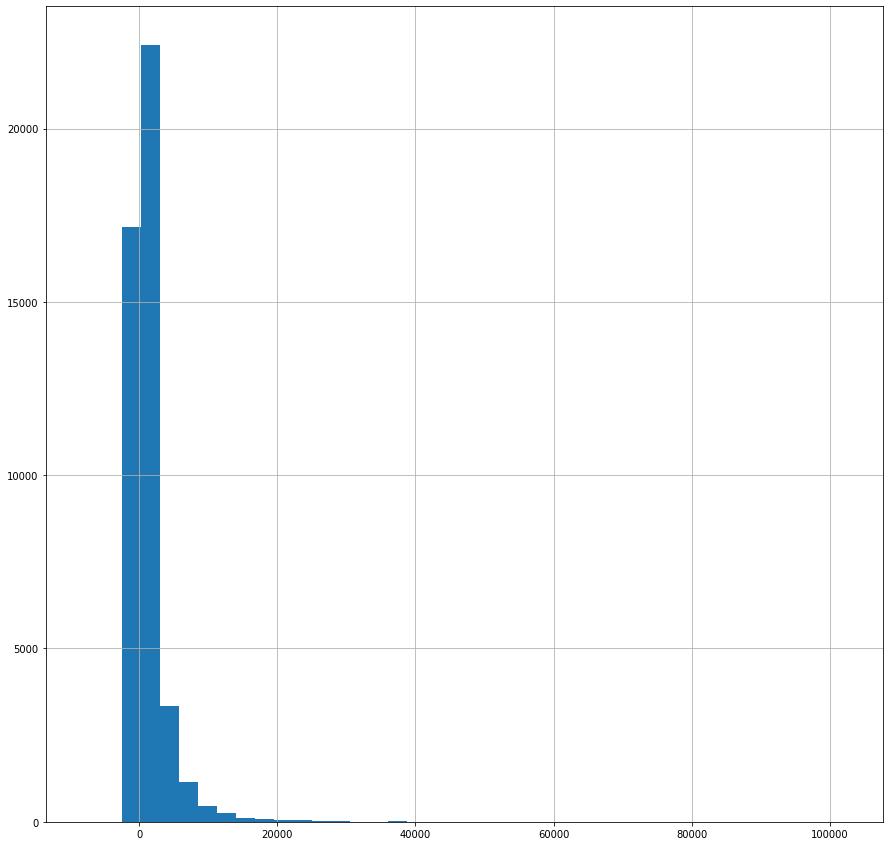

In [ ]:
plt.figure(figsize=(15,15))
data['balance'].hist(bins=40)
plt.show()

In [ ]:
data['balance'].max()

102127

In [ ]:
data = data[data['balance'] < 35000]

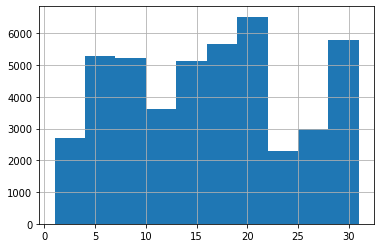

In [ ]:
data['day'].hist()

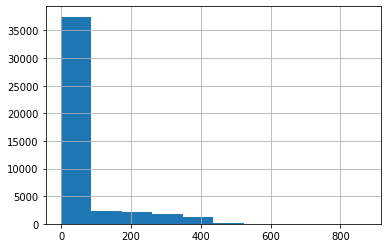

In [ ]:
data['pdays'].hist()

In [ ]:
#функция для просмотра какой процент пропущенных данных мы имеем
def missing_values_table(data):
        # Общее количество пропущенных значений
        mis_val = data.isnull().sum()
        # Доля пропущенных значений
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        # Таблица с результатом расчета
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Переименовываем столбцы
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Сортируем по столбцу с долей пропущенных значений в порядке убывания
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Вывод сводной информации
        print("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

# Статистика пропущенных значений
missing_values = missing_values_table(data)
missing_values.head(15)

Your selected dataframe has 17 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Подавление предупреждений
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Создаем объект label encoder для преоброзования категориальных признаков в числовые
le = LabelEncoder()
le_count = 0
# Проходим по всем столбцам
for col in data:
    if data[col].dtype == 'object':
        # Если признак имеет 5 или менее уникальных значения
        if len(list(data[col].unique())) <= 2:
            # Обучаем LabelEncoder на тренировочных данных
            le.fit(data[col])
            # Трансформируем обучающий и тестовый датафреймы
            data[col] = le.transform(data[col])
            #data_test[col] = le.transform(data_test[col])
            
            # Подсчитываем, сколько признаков обработано методом LabelEncoder
            le_count += 1
print('%d колонок было преобразовано.' % le_count)

4 колонок было преобразовано.


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


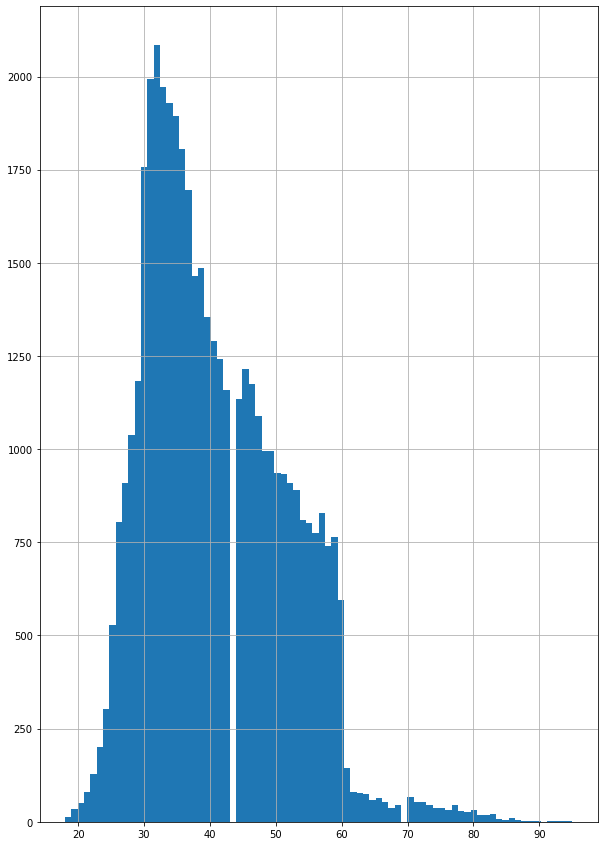

In [ ]:
plt.figure(figsize=(10,15))
data['age'].hist(bins=80)
plt.show()

In [ ]:
data = data[data['age']< 85]

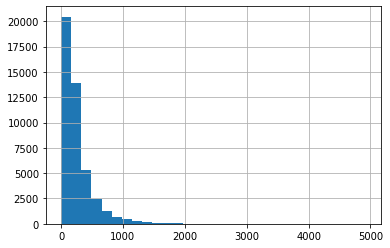

In [ ]:
data['duration'].hist(bins=30)

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
df = data.drop(['job','marital','education','contact','month','poutcome'],axis=1)

In [ ]:
df.head(20)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0
5,35,0,231,1,0,5,139,1,-1,0,0
6,28,0,447,1,1,5,217,1,-1,0,0
7,42,1,2,1,0,5,380,1,-1,0,0
8,58,0,121,1,0,5,50,1,-1,0,0
9,43,0,593,1,0,5,55,1,-1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45138 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45138 non-null  int64
 1   default   45138 non-null  int64
 2   balance   45138 non-null  int64
 3   housing   45138 non-null  int64
 4   loan      45138 non-null  int64
 5   day       45138 non-null  int64
 6   duration  45138 non-null  int64
 7   campaign  45138 non-null  int64
 8   pdays     45138 non-null  int64
 9   previous  45138 non-null  int64
 10  y         45138 non-null  int64
dtypes: int64(11)
memory usage: 4.1 MB


In [ ]:
corr = df.corr()['y']

In [ ]:
corr 

age         0.020560
default    -0.022321
balance     0.058835
housing    -0.138534
loan       -0.067853
day        -0.028592
duration    0.394682
campaign   -0.073238
pdays       0.103785
previous    0.093018
y           1.000000
Name: y, dtype: float64

In [ ]:
#df = data[['housing','contact','duration','previous','campaign','pdays','y']]

In [ ]:
#df.head()

In [ ]:
X = df.drop(['y'],axis=1)
y = df['y']

In [ ]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [ ]:
logit = LogisticRegression()

In [ ]:
model = logit.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

0.8893221089942401

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# предсказать значения тестовой выборки
predictions_log = model.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test, predictions_log,average='micro')

0.8893221089942401

In [ ]:
kf_logit = KFold(n_splits = 10,shuffle = True,random_state = 41)

In [ ]:
cv_results_logit = cross_val_score(logit,X,y,cv = kf_logit,scoring = "precision",n_jobs = -1)

In [ ]:
cv_results_logit.mean()

0.574202574108009

In [ ]:
ss = cross_val_score(logit,X,y,cv=10,scoring="precision")

In [ ]:
ss.mean()

0.5474576229860111